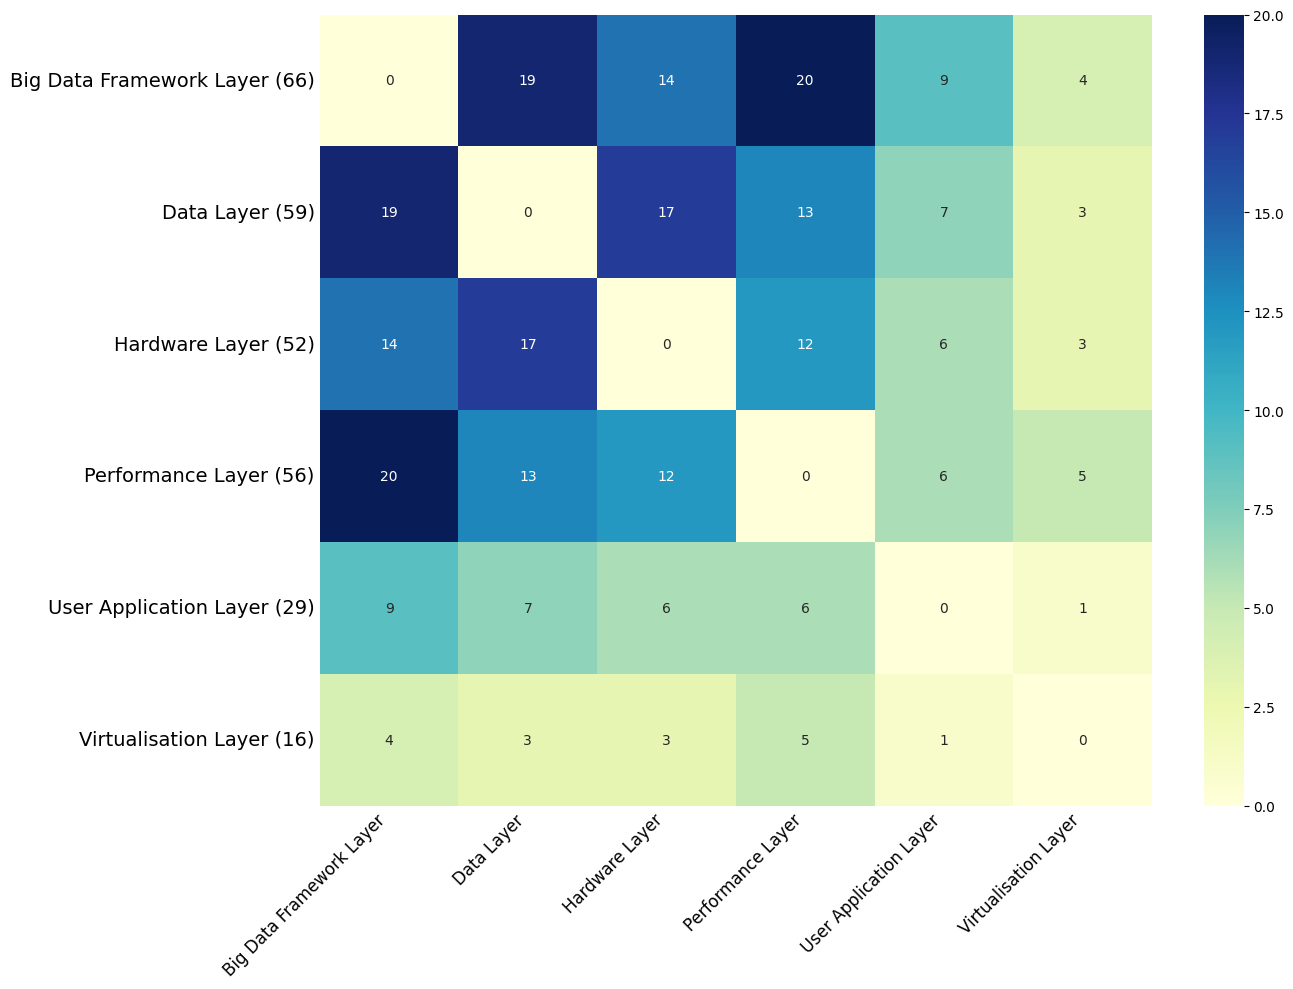

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data.database import two_tupel_combinations

# Identify unique layers
layers = set()
for pair, _ in two_tupel_combinations:
    layers.update(pair)
layers = sorted(list(layers))

# Mapping from layers to indices for the matrix
layer_index = {layer: i for i, layer in enumerate(layers)}

# Initialize empty matrix
matrix = np.zeros((len(layers), len(layers)))

# Fill matrix with frequencies
for (layer1, layer2), frequency in daten:
    i, j = layer_index[layer1], layer_index[layer2]
    matrix[i, j] = frequency
    matrix[j, i] = frequency  # Make the matrix symmetric

# Calculate overall frequency of each layer
layer_frequencies = {layer: 0 for layer in layers}
for (layer1, layer2), frequency in daten:
    layer_frequencies[layer1] += frequency
    layer_frequencies[layer2] += frequency

# Add overall frequencies to layer names
layers_with_freq = [f"{layer} ({freq})" for layer, freq in layer_frequencies.items()]

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, fmt=".0f", cmap="YlGnBu", xticklabels=layers, yticklabels=layers_with_freq)
#plt.title("Frequencies of the 2-layer combinations")

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.gca().tick_params(axis='both', which='both', length=0)
plt.gca().spines[:].set_visible(False)

# Adjust layout to fit the additional text
plt.tight_layout(rect=[0, 0, 1.15, 1])
plt.show()
